In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
import numpy as np
import glob
import os
from google.colab import drive
drive.mount('/content/drive')

IMAGE_SIZE = [224, 224]
train_path = "/content/drive/MyDrive/fake currancy/train 1"
valid_path = "/content/drive/MyDrive/fake currancy/testsss"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folders = glob.glob('/content/drive/MyDrive/fake currancy/train 1/*')


In [ ]:
folders

['/content/drive/MyDrive/fake currancy/train 1/Twentynote',
 '/content/drive/MyDrive/fake currancy/train 1/2Hundrednote',
 '/content/drive/MyDrive/fake currancy/train 1/Fiftynote',
 '/content/drive/MyDrive/fake currancy/train 1/1Hundrednote',
 '/content/drive/MyDrive/fake currancy/train 1/5Hundrednote',
 '/content/drive/MyDrive/fake currancy/train 1/Tennote',
 '/content/drive/MyDrive/fake currancy/train 1/2Thousandnote']

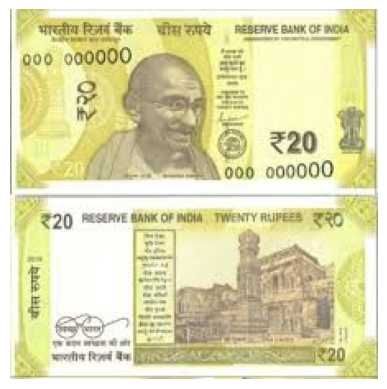

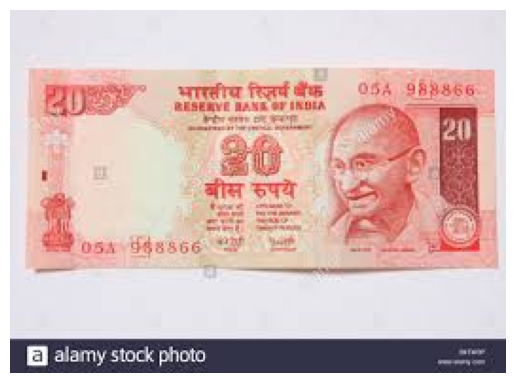

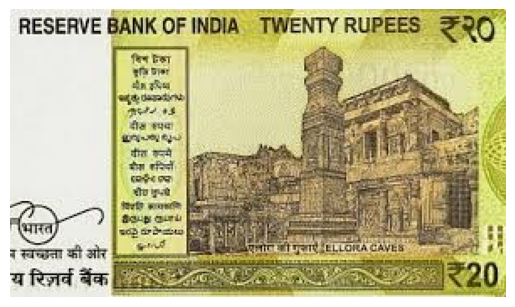

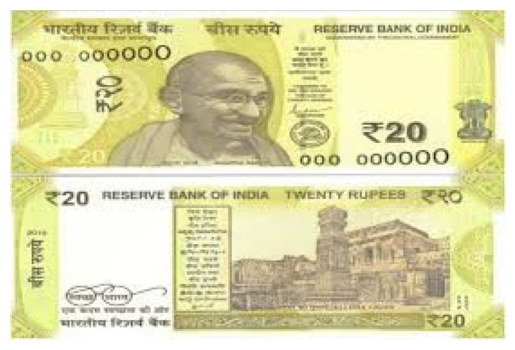

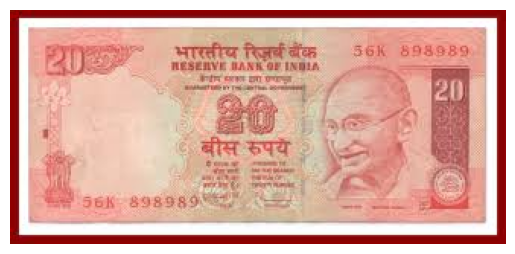

In [ ]:
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from glob import glob
import os

train_image_files = glob(os.path.join(train_path, '*/*.jpg'))
num_images_to_display = 5
for img_path in train_image_files[:num_images_to_display]:
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [ ]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = datagen.flow_from_directory(train_path, target_size=(IMAGE_SIZE[0], IMAGE_SIZE[1]), batch_size=32, class_mode='categorical')
valid_set = datagen.flow_from_directory(valid_path, target_size=(IMAGE_SIZE[0], IMAGE_SIZE[1]), batch_size=32, class_mode='categorical')
base_model = MobileNet(weights='imagenet', include_top=False,input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
preds = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=preds)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(train_set, validation_data=valid_set, epochs=10, steps_per_epoch=len(train_set), validation_steps=len(valid_set))

Found 153 images belonging to 7 classes.
Found 42 images belonging to 7 classes.
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 107s 19s/step - accuracy: 0.1777 - loss: 1.9924 - val_accuracy: 0.2619 - val_loss: 1.8502
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step - accuracy: 0.6578 - loss: 1.5245 - val_accuracy: 0.4048 - val_loss: 1.7191
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 35s 7s/step - accuracy: 0.8789 - loss: 1.0583 - val_accuracy: 0.2619 - val_loss: 1.7269
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step - accuracy: 0.9274 - loss: 0.7141 - val_accuracy: 0.3810 - val_loss: 1.5174
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 7s/step - accuracy: 0.9691 - loss: 0.4299 - val_accuracy: 0.5000 - val_loss: 1.3796
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 36s 7s/step - accuracy: 0.9764 - loss: 0.2255 - val_accuracy: 0.5238 - val_loss: 1.4183
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 7s/step - accuracy: 1.0000 - loss: 0.1269 - val_accuracy: 0.4286 - val_loss: 1.5204
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.9870 - loss: 0.1071 - val_accuracy: 0.5714 - val_loss: 1.3096
Epoch 

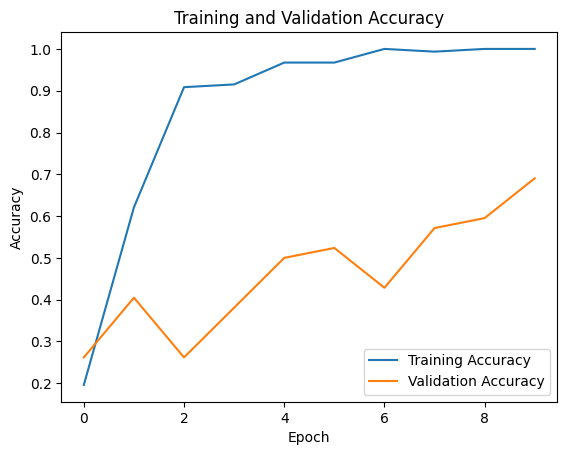

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
training_accuracy = hist.history['accuracy']
validation_accuracy = hist.history['val_accuracy']

print("===== Training Summary =====")
print(f"Final Training Accuracy: {training_accuracy[-1] * 100:.2f}%")
print(f"Peak Validation Accuracy: {max(validation_accuracy) * 100:.2f}%")


===== Training Summary =====
Final Training Accuracy: 100.00%
Peak Validation Accuracy: 69.05%


In [ ]:
model.save("fake_currrecy_detection.h5")


In [ ]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('fake_currrecy_detection.h5')

In [ ]:
test_image_path = '/content/drive/MyDrive/fake currancy/testsss/1Hundrednote/1.jpg'

test_img = image.load_img(test_image_path, target_size=IMAGE_SIZE)
test_img_array = image.img_to_array(test_img)
test_img_array = np.expand_dims(test_img_array, axis=0)


test_img_array = test_img_array / 255.0

predictions = loaded_model.predict(test_img_array)
class_labels =  ['Class_0', 'Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6']
fake_classes = {0, 1, 2}
real_classes = {3, 4, 5, 6}

predicted_class_index = np.argmax(predictions[0])

if predicted_class_index in fake_classes:
    predicted_class_label = "Fake"
elif predicted_class_index in real_classes:
    predicted_class_label = "Real"
else:
    predicted_class_label = "Unknown"

print("Predicted class:", predicted_class_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: Fake


In [ ]:
print("Predictions:", predictions)
print("Predictions Shape:", predictions.shape)


Predictions: [[9.1551661e-01 4.6188915e-03 2.7336001e-03 3.6957562e-03 6.8794638e-02
  3.5425497e-04 4.2861998e-03]]
Predictions Shape: (1, 7)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Ensure num_classes is defined correctly
num_classes = len(folders)  # Assuming 'folders' is your list of class names

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(120, activation='relu'),
    Dense(num_classes, activation="softmax")  # ✅ Use integer, not a list
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(train_set, epochs=25, validation_data=valid_set)

model.save("cnn_model.h5")  # ✅ This will now work correctly


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 120)                 │      11,197,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             847 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,203,495 (42.74 MB)

 Trainable params: 11,203,495 (42.74 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.1212 - loss: 9.3872 - val_accuracy: 0.1190 - val_loss: 5.5230
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.1397 - loss: 3.6953 - val_accuracy: 0.2143 - val_loss: 1.8817
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.1710 - loss: 1.9106 - val_accuracy: 0.2857 - val_loss: 1.7645
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.3204 - loss: 1.7882 - val_accuracy: 0.3095 - val_loss: 1.6922
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.3299 - loss: 1.6831 - val_accuracy: 0.3810 - val_loss: 1.5873
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.3794 - loss: 1.5908 - val_accuracy: 0.4048 - val_loss: 1.4329
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5188 - loss: 1.3388 - val_accuracy: 0.5476 - val_loss: 1.2848
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5692 - loss: 1.2541 - val_accuracy: 0.5476 - val_loss: 1.1918
Epoch 9/25

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.1,
                                 patience=3,
                                 min_lr=1e-6,
                                 verbose=1)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Fine-tuning
for layer in base_model.layers[-30:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_set, epochs=5, validation_data=valid_set, callbacks=[lr_scheduler])


Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 197s 26s/step - accuracy: 0.1530 - loss: 2.4562 - val_accuracy: 0.1190 - val_loss: 2.0625 - learning_rate: 1.0000e-04
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 127s 25s/step - accuracy: 0.2969 - loss: 2.0260 - val_accuracy: 0.1429 - val_loss: 2.0782 - learning_rate: 1.0000e-04
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 126s 25s/step - accuracy: 0.3047 - loss: 1.6972 - val_accuracy: 0.1429 - val_loss: 2.1013 - learning_rate: 1.0000e-04
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 0.4272 - loss: 1.4901 
Epoch 4: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
5/5 ━━━━━━━━━━━━━━━━━━━━ 142s 25s/step - accuracy: 0.4311 - loss: 1.4874 - val_accuracy: 0.1190 - val_loss: 2.0668 - learning_rate: 1.0000e-04
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 131s 27s/step - accuracy: 0.4506 - loss: 1.4134 - val_accuracy: 0.1429 - val_loss: 2.0788 - learning_rate: 1.0000e-05


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)


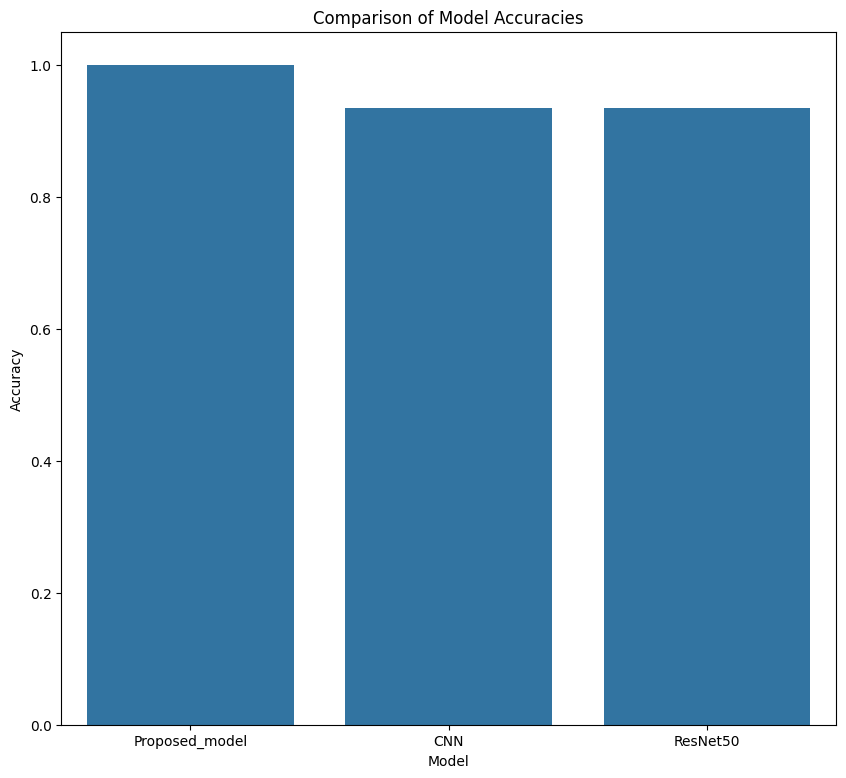

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


mobile_acc = hist.history['accuracy'][-1]
cnn_acc = history.history['accuracy'][-1]
resnet_acc = history.history['accuracy'][-1]


data = {
    'Model': ['Proposed_model', 'CNN', 'ResNet50'],
    'Accuracy': [mobile_acc, cnn_acc, resnet_acc]
}

plt.figure(figsize=(10, 9))
sns.barplot(x='Model', y='Accuracy', data=data)


plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.show()

In [ ]:
mobile_acc = hist.history['accuracy'][-1]     # Proposed_model
cnn_acc = history.history['accuracy'][-1]     # CNN
resnet_acc = history.history['accuracy'][-1]  # ResNet50


print(f"Proposed_model Accuracy: {mobile_acc * 100:.2f}%")
print(f"CNN Accuracy: {cnn_acc * 100:.2f}%")
print(f"ResNet50 Accuracy: {resnet_acc * 100:.2f}%")


Proposed_model Accuracy: 100.00%
CNN Accuracy: 93.46%
ResNet50 Accuracy: 93.46%
